## IMDB


In [1]:
#open libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df_basics = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/title.basics.tsv.gz', compression='gzip', header=0 , quotechar='"', error_bad_lines=False, sep = '\t', na_values=['\\N'])

C:\Users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"


In [4]:
# filter starYear >= 2010
df_basics.startYear = df_basics['startYear'].astype(np.float)
basics = df_basics[(df_basics.startYear >= 2000) & (df_basics.startYear <= 2020)]

In [8]:
basics.startYear.describe()

count    4.597138e+06
mean     2.012144e+03
std      5.284744e+00
min      2.000000e+03
25%      2.008000e+03
50%      2.013000e+03
75%      2.017000e+03
max      2.020000e+03
Name: startYear, dtype: float64

In [6]:
# rename column to join the dfs
basics.rename(columns = {'primaryTitle': 'movie_name'}, inplace = True)

C:\Users\camil\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
basics.sort_values('startYear')

,tconst,titleType,movie_name,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
839201,tt0865545,tvMovie,Who's Aping Who? Social Climbing,Who's Aping Who? Social Climbing,0,2000.0,NaN,52,Documentary
482417,tt0501559,tvEpisode,Episode dated 10 July 2000,Episode dated 10 July 2000,0,2000.0,NaN,NaN,News
482416,tt0501558,tvEpisode,Episode dated 6 July 2000,Episode dated 6 July 2000,0,2000.0,NaN,NaN,News
482415,tt0501557,tvEpisode,Episode dated 3 July 2000,Episode dated 3 July 2000,0,2000.0,NaN,NaN,News
482414,tt0501556,tvEpisode,Episode dated 23 June 2000,Episode dated 23 June 2000,0,2000.0,NaN,NaN,News
...,...,...,...,...,...,...,...,...,...
1168930,tt10350624,movie,Mimi From Rio,Mimi From Rio,0,2020.0,NaN,NaN,Adventure
2119859,tt12010148,tvEpisode,The Porn Anomaly,The Porn Anomaly,1,2020.0,NaN,NaN,Adult
6570800,tt9362620,movie,D.E.M.O.N.I.C. Stories,D.E.M.O.N.I.C. Stories,0,2020.0,NaN,NaN,Horror
1169101,tt10350920,short,The Simplicity of Life,The Simplicity of Life,0,2020.0,NaN,NaN,"Comedy,Drama,Short"


## Rotten Tomatoes

[Kaggle](https://www.kaggle.com/aaronjun/rotten-tomato-1960-2020/data?select=rt_movie_review.csv)

### Rotten Info

In [9]:
# open df
df = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/rt_movie_info.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [10]:
df.head()

,movie_link,movie_name,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,audience_fresh_top_critics_count,audience_rotten_rotten_critics_count,tomatometer_avg_rating,audience_top_critics_avg_rating,score_sentiment,audience_avg_rating
0,/m/312291718,Tillie's Punctured Romance,NR,"Classics,Comedy","Charles Bennett,Mack Sennett",Hampton Del Ruth,"This Keystone comedy, Charlie Chaplin's 33rd, ...",https://resizing.flixster.com/2cfo_iZmt1DetxOR...,"Charles Chaplin,Marie Dressler,Mabel Normand,C...","Jan 1, 1914",...,972.0,1,5,1,1,0,6.38,0.0,NEGATIVE,3.21
1,/m/770681144,Tango Tangles,NR,Comedy,Mack Sennett,Mack Sennett,Tango Tangles is an impromptu Keystone comedy ...,https://resizing.flixster.com/AJKmCcDUQqEOdT3n...,"Glen Cavender,Charles Chaplin,Edgar Kennedy,Fr...","Mar 9, 1914",...,183.0,0,0,0,0,0,0.00,0.0,NEGATIVE,2.65
2,/m/20297,Cabiria,NR,"Art House & International,Classics,Drama",Giovanni Pastrone,Gabriele D'Annunzio,The ancient conflict between Rome and Carthage...,https://resizing.flixster.com/NA4TdKSRbmLNhJKw...,"Alex Bernard,Italia Almirante-Manzini,Lidia Qu...","Jun 1, 1914",...,1153.0,4,8,1,4,0,7.75,10.0,POSITIVE,3.70
3,/m/770680394,The Magic Cloak of Oz,NR,"Action & Adventure,Drama,Kids & Family,Science...",J. Farrell MacDonald,L. Frank Baum,Author L. Frank Baum adapts his own original s...,https://resizing.flixster.com/qgZlce0CF5nUrmUX...,"Violet MacMillan,Vivian Reed,Mildred Harris,Fr...","Sep 28, 1914",...,NaN,0,0,0,0,0,0.00,0.0,NaN,NaN
4,/m/21368,Regeneration,NR,"Classics,Drama",Raoul Walsh,"Raoul Walsh,Carl Harbaugh",Noteworthy as the first ever feature-length cr...,https://resizing.flixster.com/1aKm46hSGRdsc_Fs...,"Rockliffe Fellowes,Anna Q. Nilsson,William She...","Sep 13, 1915",...,401.0,2,5,0,2,0,9.17,0.0,POSITIVE,3.50


In [11]:
# print info about 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   movie_link                            13001 non-null  object 
 1   movie_name                            13001 non-null  object 
 2   rating                                13001 non-null  object 
 3   genre                                 12965 non-null  object 
 4   directors                             12679 non-null  object 
 5   writers                               11184 non-null  object 
 6   movie_info                            12507 non-null  object 
 7   poster_image                          13001 non-null  object 
 8   casts                                 12694 non-null  object 
 9   in_theaters_date                      11165 non-null  object 
 10  on_streaming_date                     10646 non-null  object 
 11  runtime_in_minu

## Join IMDB and Rotten Tomatoes

In [12]:
# left join on multiple columns
df_rt = df.merge(basics, on = 'movie_name', how = 'left')

In [13]:
df_rt.shape

(88535, 39)

In [14]:
df.shape

(13001, 31)

In [15]:
basics.shape

(4597138, 9)

In [16]:
# remove duplicates rows
df_rt.drop_duplicates(subset ="movie_name", 
                     keep = False, inplace = True)

In [17]:
df_rt.shape

(6346, 39)

In [18]:
df_rt.head()

,movie_link,movie_name,rating,genre,directors,writers,movie_info,poster_image,casts,in_theaters_date,...,score_sentiment,audience_avg_rating,tconst,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,/m/312291718,Tillie's Punctured Romance,NR,"Classics,Comedy","Charles Bennett,Mack Sennett",Hampton Del Ruth,"This Keystone comedy, Charlie Chaplin's 33rd, ...",https://resizing.flixster.com/2cfo_iZmt1DetxOR...,"Charles Chaplin,Marie Dressler,Mabel Normand,C...","Jan 1, 1914",...,NEGATIVE,3.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/m/770681144,Tango Tangles,NR,Comedy,Mack Sennett,Mack Sennett,Tango Tangles is an impromptu Keystone comedy ...,https://resizing.flixster.com/AJKmCcDUQqEOdT3n...,"Glen Cavender,Charles Chaplin,Edgar Kennedy,Fr...","Mar 9, 1914",...,NEGATIVE,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/20297,Cabiria,NR,"Art House & International,Classics,Drama",Giovanni Pastrone,Gabriele D'Annunzio,The ancient conflict between Rome and Carthage...,https://resizing.flixster.com/NA4TdKSRbmLNhJKw...,"Alex Bernard,Italia Almirante-Manzini,Lidia Qu...","Jun 1, 1914",...,POSITIVE,3.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/770680394,The Magic Cloak of Oz,NR,"Action & Adventure,Drama,Kids & Family,Science...",J. Farrell MacDonald,L. Frank Baum,Author L. Frank Baum adapts his own original s...,https://resizing.flixster.com/qgZlce0CF5nUrmUX...,"Violet MacMillan,Vivian Reed,Mildred Harris,Fr...","Sep 28, 1914",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,/m/770692235,Joan the Woman,NR,"Action & Adventure,Classics,Drama",Cecil B. DeMille,Jeanie Macpherson,A sweeping chronicle of the life and death of ...,https://resizing.flixster.com/t7RKwDtBYo_QGxZI...,"Geraldine Farrar,Raymond Hatton,Hobart Boswort...","Dec 25, 1916",...,NEGATIVE,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
basics_test = basics[['originalTitle', 'movie_name']]

In [20]:
basics_test.sort_values('movie_name')

,originalTitle,movie_name
3135041,!Que ve el Bisbe!,!Que ve el Bisbe!
2777981,Women Art Revolution,!Women Art Revolution
3428700,#,#
5346689,#,#
4008766,#,#
...,...,...
3037719,NaN,NaN
4296325,NaN,NaN
4905414,NaN,NaN
6183589,NaN,NaN


In [21]:
df_test = df_rt[['originalTitle', 'movie_name']]

In [22]:
df_test.sort_values('movie_name')

,originalTitle,movie_name
66662,#Screamers,#Screamers
15195,NaN,'Breaker' Morant
21342,NaN,'Night Mother
21375,'Round Midnight,'Round Midnight
32996,NaN,'Til There Was You
...,...,...
14873,NaN,Zulu Dawn
75826,Zusje,Zusje
65406,iBoy,iBoy
6938,NaN,Ã Meia-Noite Levarei Sua Alma (At Midnight I'...


#### in_theaters_date

In [23]:
# convert to date format

## convert to date
df_rt['in_theaters_date'] = df_rt.in_theaters_date.astype('datetime64')

## get only the year
df_rt['date_year'] = df_rt.in_theaters_date.dt.year

## get only the month
df_rt['date_month'] = df_rt.in_theaters_date.dt.month

#filter date_year >= 2010
df_rt2 = df_rt[df_rt.date_year >= 2010]

In [24]:
print("Now the dataset has:", df_rt2.shape[0], "movies")

Now the dataset has: 562 movies


#### tomatometer

In [25]:
df_rt2.tomatometer_status.value_counts()

rotten             201
certified_fresh    164
fresh              148
Name: tomatometer_status, dtype: int64

In [26]:
print(round(df_rt2.tomatometer_status.count()/len(df_rt2) * 100, 2),'% of the dataset have tomatometer status')

91.28 % of the dataset have tomatometer status


In [27]:
# create a dummy variable with tomatometer status
## rotten = 0
## fresh|certified_fresh = 1
df_rt2['status.dummy'] = df_rt2.loc[:, 'tomatometer_status'].replace({'rotten': 0,
                                                      'fresh': 1,
                                                      'certified_fresh':1})

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df_rt2['status.dummy'].value_counts()

1.0    312
0.0    201
Name: status.dummy, dtype: int64

#### movie_info

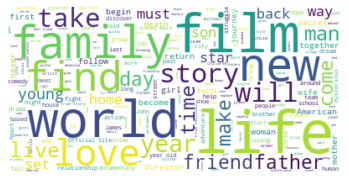

In [29]:
# plot the most frequent words in the movies
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# combine multiple rows into one object
text = df_rt2['movie_info'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine"])


# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#wc.to_file("rotten.png")
#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

##### Rotten and Fresh Wordclouds

In [30]:
# combine multiple rows into one object
text_rotten = df_rt2.loc[('status_dummy' == 0):,'movie_info'].str.cat(sep='/ ')
text_fresh = df_rt2.loc[('status_dummy' == 1):,'movie_info'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "tree", "four", "five", "six", "seven", "eight", "nine"])


# Create and generate a word cloud image:
wc_rotten= WordCloud(stopwords = stopwords, background_color="white").generate(text_rotten)
wc_fresh = WordCloud(stopwords = stopwords, background_color="white").generate(text_fresh)

#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

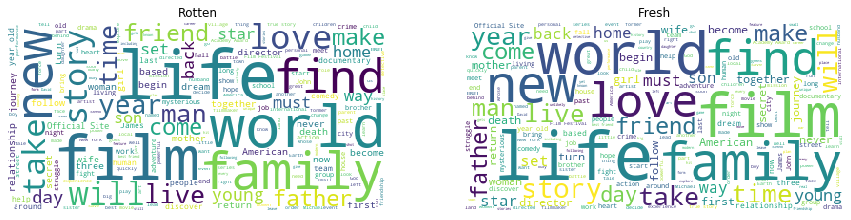

In [31]:
# Display the generated image:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(wc_rotten)
axarr[0].axis("off")
axarr[0].set_title("Rotten")
axarr[1].imshow(wc_fresh)
axarr[1].axis("off")
axarr[1].set_title("Fresh")
plt.show()

### Rotten Review

In [32]:
review = pd.read_csv('C:/Users/camil/Desktop/Projeto Integrador/dados/rt_movie_review.csv')

In [33]:
review.head()

,movie_link,movie_id,review_date,critic_publication,critic_icon,critic_top,critic_score,review_content
0,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,01/07/2004,Arizona Republic,fresh,Top Critic,4/5,"Has more belly laughs than 10 studio-produced,..."
1,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,01/07/2004,Minneapolis Star Tribune,rotten,Top Critic,0.5/4,Calling this story about a quirky high-school ...
2,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/06/2004,Variety,rotten,Top Critic,NaN,There are lots of laughs for those who enjoy t...
3,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/06/2004,Slant Magazine,rotten,NaN,.5/4,For those who think there'e nothing funnier th...
4,https://www.rottentomatoes.com/m/napoleon_dyna...,/m/10007,02/07/2004,St. Paul Pioneer Press,fresh,NaN,3.5/4,We laugh at all the nerdy behavior in the movi...


In [34]:
df_rt2.rename(columns = {'movie_link': 'movie_id'}, inplace = True)

C:\Users\camil\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
## right join the two rotten tomatoes df
rotten = review.merge(df_rt2, on = 'movie_id', how = 'right')

In [36]:
rotten.head()

,movie_link,movie_id,review_date,critic_publication,critic_icon,critic_top,critic_score,review_content,movie_name,rating,...,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,date_year,date_month,status.dummy
0,https://www.rottentomatoes.com/m/the_wind_will...,/m/20377,01/01/2000,New York Times,fresh,Top Critic,4.5/5,NaN,The Wind Will Carry Us,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,6.0,1.0
1,https://www.rottentomatoes.com/m/the_wind_will...,/m/20377,01/01/2000,Boston Herald,fresh,NaN,3.5/4,NaN,The Wind Will Carry Us,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,6.0,1.0
2,https://www.rottentomatoes.com/m/the_wind_will...,/m/20377,01/01/2000,Compuserve,fresh,NaN,7/10,NaN,The Wind Will Carry Us,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,6.0,1.0
3,https://www.rottentomatoes.com/m/the_wind_will...,/m/20377,01/01/2000,Seattle Post-Intelligencer,fresh,NaN,10/10,NaN,The Wind Will Carry Us,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,6.0,1.0
4,https://www.rottentomatoes.com/m/the_wind_will...,/m/20377,01/01/2000,Empire Magazine,fresh,NaN,4/5,NaN,The Wind Will Carry Us,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,6.0,1.0


In [37]:
rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36278 entries, 0 to 36277
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   movie_link                            36097 non-null  object        
 1   movie_id                              36278 non-null  object        
 2   review_date                           36097 non-null  object        
 3   critic_publication                    36097 non-null  object        
 4   critic_icon                           36097 non-null  object        
 5   critic_top                            10007 non-null  object        
 6   critic_score                          26142 non-null  object        
 7   review_content                        35930 non-null  object        
 8   movie_name                            36278 non-null  object        
 9   rating                                36278 non-null  object        
 10

In [38]:
#movies with more reviews
rotten.movie_name.value_counts()

Once Upon a Time In Hollywood        530
Live Die Repeat: Edge of Tomorrow    314
Dawn Of The Planet Of The Apes       308
PokÃ©mon Detective Pikachu           294
King Arthur: Legend Of The Sword     265
                                    ... 
Dragon Ball Z: Battle Of Gods          1
Supporting Characters                  1
Jamesy Boy                             1
Gregory's Girl                         1
Chennai Express                        1
Name: movie_name, Length: 562, dtype: int64

Text(0, 0.5, '')

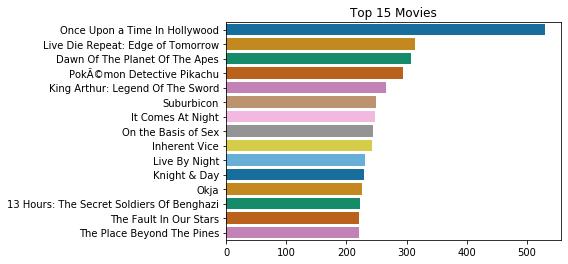

In [39]:
sns.countplot(y = rotten.movie_name, order = rotten.movie_name.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Movies')
plt.xlabel('')
plt.ylabel('')

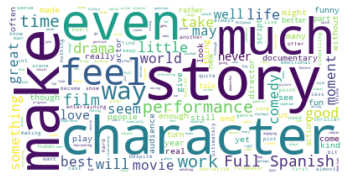

In [40]:
# plot the most frequent words in the review content

# combine multiple rows into one object
text_review = rotten['review_content'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['movie', 'review', 'film', 'one', 'two', 'three'])


# Create and generate a word cloud image:
wc_review= WordCloud(stopwords = stopwords, background_color="white").generate(text_review)

# Display the generated image:
plt.imshow(wc_review, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# combine multiple rows into one object
review_rotten = rotten.loc[('status_dummy' == 0):,'review_content'].str.cat(sep='/ ')
review_fresh = rotten.loc[('status_dummy' == 1):,'review_content'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['movie', 'review', 'film', 'one', 'two', 'three'])


# Create and generate a word cloud image:
wc_rr= WordCloud(stopwords = stopwords, background_color="white").generate(review_rotten)
wc_rf = WordCloud(stopwords = stopwords, background_color="white").generate(review_fresh)

#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python

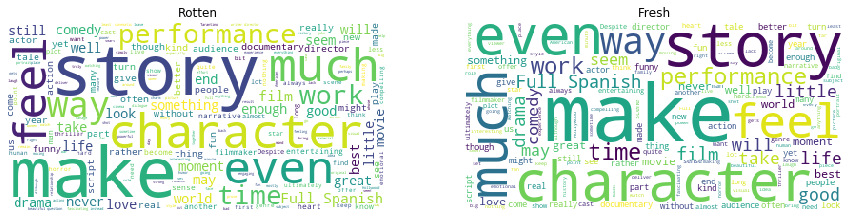

In [42]:
# Display the generated image:
f, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(wc_rr)
ax[0].axis("off")
ax[0].set_title("Rotten")
ax[1].imshow(wc_rf)
ax[1].axis("off")
ax[1].set_title("Fresh")
plt.show()

#### Genres

In [43]:
rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36278 entries, 0 to 36277
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   movie_link                            36097 non-null  object        
 1   movie_id                              36278 non-null  object        
 2   review_date                           36097 non-null  object        
 3   critic_publication                    36097 non-null  object        
 4   critic_icon                           36097 non-null  object        
 5   critic_top                            10007 non-null  object        
 6   critic_score                          26142 non-null  object        
 7   review_content                        35930 non-null  object        
 8   movie_name                            36278 non-null  object        
 9   rating                                36278 non-null  object        
 10

#### Directors

In [44]:
rotten.directors.describe()

count                 36194
unique                  529
top       Quentin Tarantino
freq                    530
Name: directors, dtype: object

Text(0, 0.5, '')

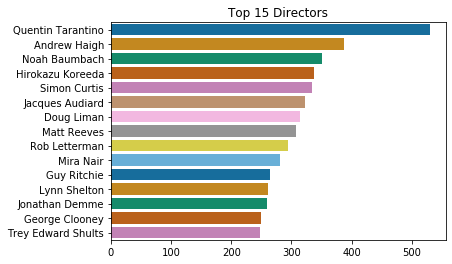

In [45]:
sns.countplot(y = rotten.directors, order=rotten.directors.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Directors')
plt.xlabel('')
plt.ylabel('')

#### Genres

In [46]:
rotten.genres.value_counts()

Drama                       2039
Comedy,Drama,Romance        1486
Comedy,Drama                1484
Documentary                 1303
Drama,Romance                783
                            ... 
Comedy,Drama,Family            1
Drama,History,Musical          1
Crime,Drama,Horror             1
Action,Comedy,Mystery          1
Action,Biography,History       1
Name: genres, Length: 137, dtype: int64

In [47]:
#create a df that split the Genres column
df_genres = rotten.assign(var1=rotten.genres.str.split(',')).explode('var1').reset_index(drop=True)

#To remove white space at the beginning of string:
df_genres['var1'] = df_genres.var1.str.lstrip()

Text(0, 0.5, '')

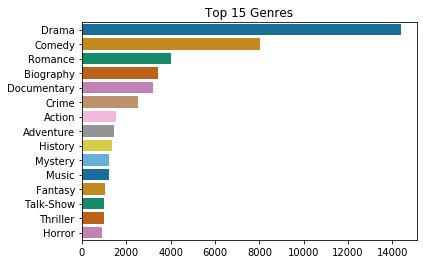

In [48]:
sns.countplot(y =df_genres.var1, order=df_genres.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Genres')
plt.xlabel('')
plt.ylabel('')

### Do fresh movies have a greater box office?

In [49]:
rotten.box_office.describe()

count           24213
unique            288
top       $77,121,429
freq              314
Name: box_office, dtype: object

In [50]:
rotten['box_office'] = rotten.box_office.str.strip(',')
rotten['box_office']= rotten.box_office.str.strip('$').astype(float)

ValueError: could not convert string to float: '48,043'